# Savitzky-Golay Filter for smoothing Fragmentation-diagrams

Function in which savitzky-golay filter is applied:

In [89]:
def savgolay_filter_catabolites(ms_data, ms_name, mode_value, mode):
    np.set_printoptions(precision=2)  
    ms_savgol = savgol_filter(ms_data, 23, 6, mode=mode_value) # apply sav-gol filter
    
    area_initial = trapz(ms_data, dx=5)
    area_savgol = trapz(ms_savgol, dx=5)
    
    # x_values = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
    x_values = np.array([0,5,10,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
    
    ax = plt.axes()
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 105])
    ax.set_xticks(x_values)
        
    if(mode == 'initial'):                
        line = plt.plot(x_values, ms_data, label = i)
    elif(mode == 'initial-savgol'):
        line1 = plt.plot(x_values, ms_data, label = i + ' initial, area: ' + str(round(area_initial)))
        line2 = plt.plot(x_values, ms_savgol, label = i + ' savgol, area: ' + str(round(area_savgol)))
    elif(mode == 'savgol'):
        line = plt.plot(x_values, ms_savgol, label = i)
        
        # Following code could be used for SVM/SVR but is not "smoothing" function
        # svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
        # y_rbf = svr_rbf.fit(x_values.reshape(-1, 1), np.array(ms_data)).predict(x_values.reshape(-1, 1))
        # plt.plot(x_values, y_rbf, color='navy',  label='RBF model')
        
    plt.xlabel('Normalised Collision Energy (%)')
    plt.ylabel('% of highest peak')
    plt.legend()
    ax.yaxis.grid()
    
    return ms_savgol

Import needed modules:

In [2]:
import numpy as np
from numpy import trapz
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from sklearn.svm import SVR # import support-vector machine

In [80]:
data = pd.io.parsers.read_csv("csv/Kuerbis_Analyse_Bindungskinetik_Fragmente873_Version1.csv")

Specify dataset on which to apply the filter:

In [81]:
catabolite = input("Specify fragmentation path: ")
fragmentation_mode = input("Specify fragmentation mode: ")

catabolites_string = input("Specify [M]-fragments of above catabolite: ")
catabolites = catabolites_string.split(",")
print(catabolites)

Specify fragmentation path: 873
Specify fragmentation mode: CID
Specify [M]-fragments of above catabolite: 873,855,837,812
['873', '855', '837', '812']


Call above defined function and print output:

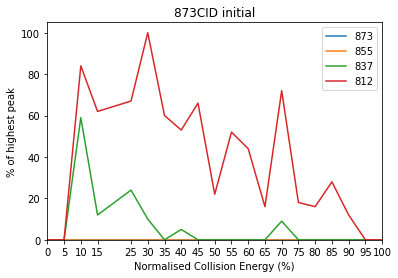

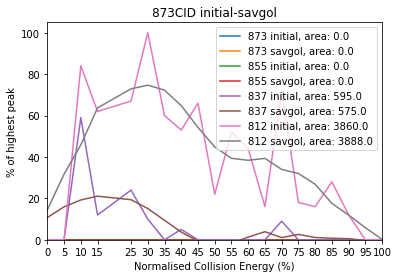

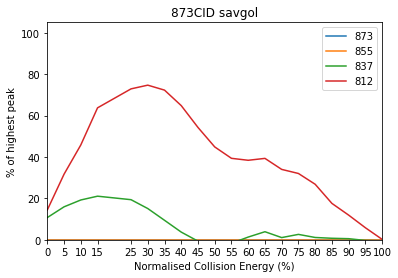

In [90]:
specify_diagrams = ['initial', 'initial-savgol', 'savgol']

for x in specify_diagrams:
    for i in catabolites:
        value = data[[i]].values
        diag = np.array(value[3:23].astype(np.int))
        value_new = savgolay_filter_catabolites(np.hstack(diag),i,'nearest', x)
        
    plt.title(catabolite+fragmentation_mode+' '+x)
    
    diag_name = 'Diagrams_output/'+catabolite+fragmentation_mode+'-'+catabolites[0]+x
    plt.savefig(diag_name+'.png')
    plt.show()